In [1]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers

## Creation of the convolutional model

In [2]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Data augmentation

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

## Rescale the data

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Callbacks

In [7]:
checkpoint = ModelCheckpoint('model_Cats_vs_Dogs.hdf5',monitor='val_accuracy', verbose= 1, save_best_only=True)

## Compiling the model

In [8]:
model.compile(loss='binary_crossentropy', optimizer =optimizers.Adam(),
             metrics=['accuracy'])

## Training the model

In [9]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                 validation_steps= 1000//32,
                 callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.4970
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to model_Cats_vs_Dogs.hdf5
62/62 [==============================] - 385s 6s/step - loss: 0.6956 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5147
Epoch 2: val_accuracy improved from 0.50000 to 0.50302, saving model to model_Cats_vs_Dogs.hdf5
62/62 [==============================] - 20s 328ms/step - loss: 0.6933 - accuracy: 0.5147 - val_loss: 0.6918 - val_accuracy: 0.5030
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.5376
Epoch 3: val_accuracy improved from 0.50302 to 0.58569, saving model to model_Cats_vs_Dogs.hdf5
62/62 [==============================] - 20s 329ms/step - loss: 0.6884 - accuracy: 0.5376 - val_loss: 0.6667 - val_accuracy: 0.5857
Epoch 4/100
62/62 [=================

## Results

In [10]:
import matplotlib.pyplot as plt

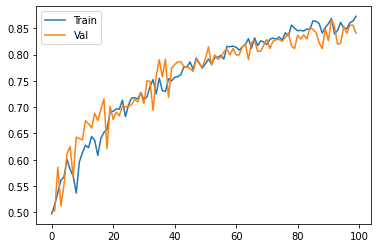

In [11]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [13]:
model2 = model 

In [14]:
model2.load_weights('./model_Cats_vs_Dogs.hdf5')

In [15]:
model2.evaluate(test_generator)

32/32 [==============================] - 90s 3s/step - loss: 0.4158 - accuracy: 0.8470


[0.41577181220054626, 0.847000002861023]